In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [ ]:
data = pd.read_csv('/content/random-linear-regression/test.csv')

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
X = data['x']
y = data['y']

In [ ]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


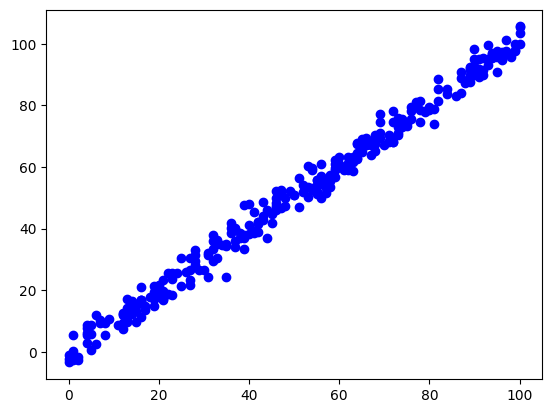

In [ ]:
plt.scatter(X, y, c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((240,), (60,))

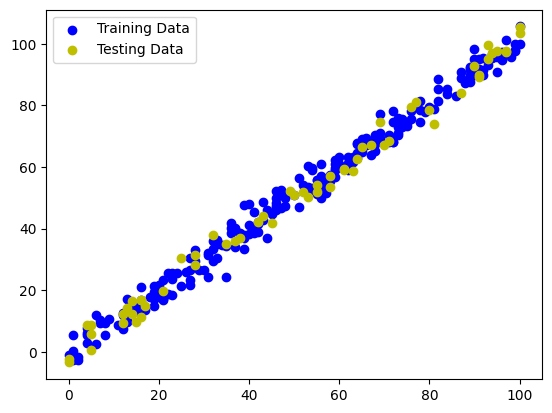

In [ ]:
plt.scatter(X_train, y_train, c='b', label = 'Training Data')
plt.scatter(X_test, y_test, c='y', label = 'Testing Data')
plt.legend()
plt.show()

### Model Building

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=['mae'])

# train model
epoch_number = 10
history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 33.1203 - mae: 33.1203
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.7381 - mae: 11.7381
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4114 - mae: 8.4114   
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2476 - mae: 4.2476
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6821 - mae: 2.6821
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2634 - mae: 3.2634
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0906 - mae: 3.0906
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4982 - mae: 3.4982 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0210 - mae: 3.0210 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6748 - mae: 2.6748 


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [ ]:
y_predictions = model.predict(X_test)
y_predictions[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[86.42673 ],
       [72.989586],
       [90.26589 ],
       [ 4.844102],
       [87.38653 ]], dtype=float32)

In [ ]:
y_test.head()

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


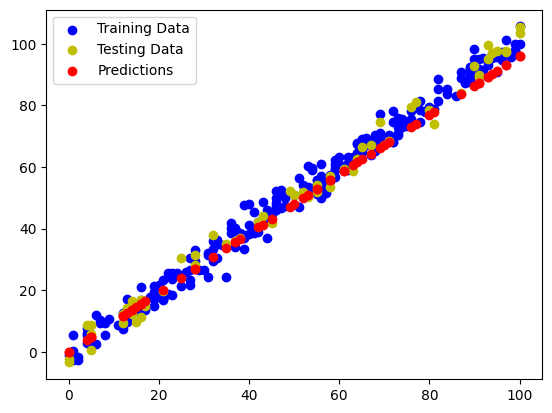

In [ ]:
plt.scatter(X_train, y_train, c='b', label = 'Training Data')
plt.scatter(X_test, y_test, c='y', label = 'Testing Data')
plt.scatter(X_test, y_predictions, c='r', label = 'Predictions')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 3.3913 - mae: 3.3913


[3.16500186920166, 3.16500186920166]

In [ ]:
history.history

{'loss': [24.248353958129883,
  10.284485816955566,
  7.582418441772461,
  4.031017780303955,
  3.0076146125793457,
  3.2475533485412598,
  3.089078187942505,
  3.334211587905884,
  3.1499273777008057,
  2.5826995372772217],
 'mae': [24.248353958129883,
  10.284485816955566,
  7.582418441772461,
  4.031017780303955,
  3.0076146125793457,
  3.2475533485412598,
  3.089078187942505,
  3.334211587905884,
  3.1499273777008057,
  2.5826995372772217]}

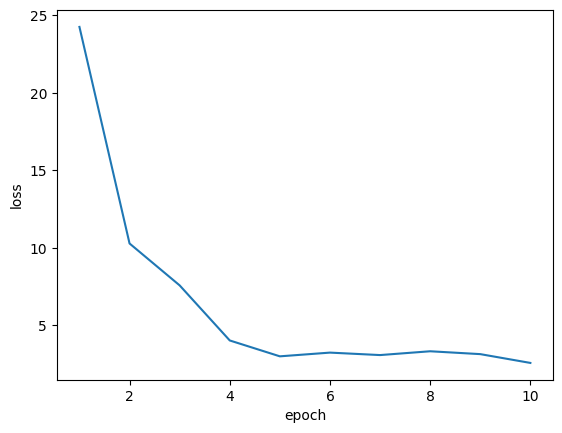

In [ ]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f'\nWeights:\n {weights} \nBiases:\n {biases}')


Weights:
 [[ 7.3789693e-03 -5.2067414e-03 -6.0366627e-02  6.3037914e-03
  -1.1836764e-03  2.3500340e-02 -7.2355224e-03 -2.1156003e-01
  -3.9649201e-03 -1.6984843e-01 -2.3716679e-02  1.9609720e-02
   1.2211544e-02  1.5164052e-01 -6.9206785e-03  6.8584964e-02
  -1.4201027e-01  2.8239600e-02  2.6937142e-01 -2.5765442e-03
  -1.5770736e-01  3.1725010e-01  1.5680000e-02  1.5310930e-01
   5.2550372e-02 -2.8637199e-02 -1.3262772e-02 -8.1708003e-03
   2.1285790e-03 -9.4382606e-02  4.1211299e-03 -1.4872447e-02
   1.3487785e-01 -6.8209395e-02 -6.7570068e-02  8.3796203e-02
   3.2369930e-01 -2.3586011e-02 -1.2878360e-02 -1.0580732e-02
  -1.5670527e-02 -3.1500203e-03  7.3453761e-05  1.8015628e-03
   3.7540160e-03 -3.2417256e-01  8.4618881e-04 -2.3382438e-02
  -1.7532773e-05  8.5547771e-03  8.9974087e-03 -9.3815520e-02
  -3.2815483e-01  2.0072019e-02 -5.0588753e-02  6.9786783e-04
  -2.3828331e-01 -2.4242401e-01 -1.7982629e-01  1.0731265e-01
   4.8904762e-02  1.5749056e-02 -3.2824332e-01  1.5859206e-